# Visualizing embeddings in 3D

The example uses [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the dimensionality fo the embeddings from 2048 to 3. Then we can visualize the data points in a 3D plot. The small dataset `dbpedia_samples.jsonl` is curated by randomly sampling 200 samples from [DBpedia validation dataset](https://www.kaggle.com/danofer/dbpedia-classes?select=DBPEDIA_val.csv).

### 1. Load the dataset and query embeddings

In [1]:
import pandas as pd
samples = pd.read_json("data/dbpedia_samples.jsonl", lines=True)
categories = sorted(samples["category"].unique())
print("Categories of DBpedia samples:", samples["category"].value_counts())
samples.head()

Categories of DBpedia samples: Artist                    21
Film                      19
Plant                     19
OfficeHolder              18
Company                   17
NaturalPlace              16
Athlete                   16
Village                   12
WrittenWork               11
Building                  11
Album                     11
Animal                    11
EducationalInstitution    10
MeanOfTransportation       8
Name: category, dtype: int64


,text,category
0,Morada Limited is a textile company based in ...,Company
1,The Armenian Mirror-Spectator is a newspaper ...,WrittenWork
2,Mt. Kinka (金華山 Kinka-zan) also known as Kinka...,NaturalPlace
3,Planning the Play of a Bridge Hand is a book ...,WrittenWork
4,Wang Yuanping (born 8 December 1976) is a ret...,Athlete


In [2]:
from openai.embeddings_utils import get_embeddings
# NOTE: The following code will send a query of batch size 200 to /embeddings, cost about $0.2
matrix = get_embeddings(samples["text"].to_list(), engine="text-similarity-babbage-001")

### 2. Reduce the embedding dimensionality

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
vis_dims = pca.fit_transform(matrix)
samples["embed_vis"] = vis_dims.tolist()

### 3. Plot the embeddings of lower dimensionality

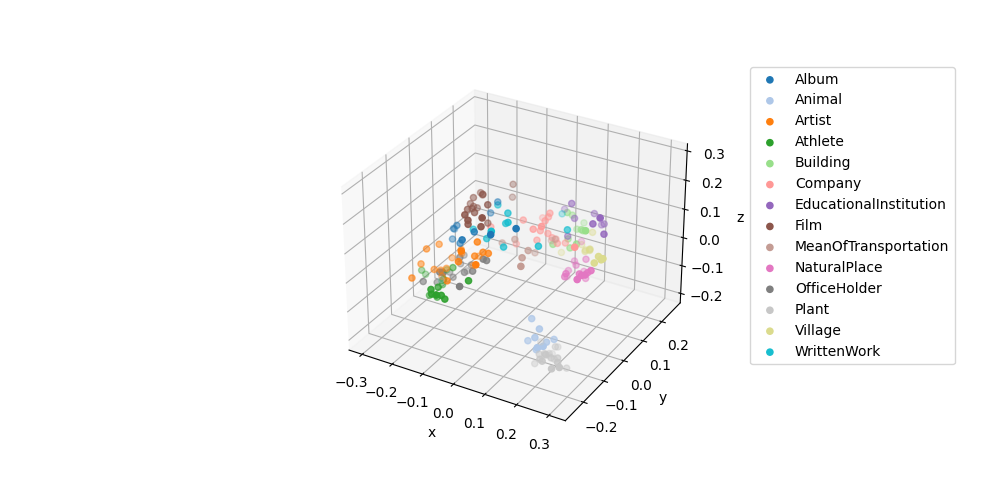

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')
cmap = plt.get_cmap("tab20")

# Plot each sample category individually such that we can set label name.
for i, cat in enumerate(categories):
    sub_matrix = np.array(samples[samples["category"] == cat]["embed_vis"].to_list())
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    z=sub_matrix[:, 2]
    colors = [cmap(i/len(categories))] * len(sub_matrix)
    ax.scatter(x, y, zs=z, zdir='z', c=colors, label=cat)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(bbox_to_anchor=(1.1, 1))